# Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the Dataset

In [2]:
df = pd.read_csv("enrollment_2024-02-18T04_27_30_WI24.csv")
df.head()

,time,subj_course_id,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct
0,1708259252333,AAS 10,A01,303104,Butler; Elizabeth Annette,1,0,34,33
1,1708259252333,AAS 10,A02,303108,Butler; Elizabeth Annette,0,0,35,35
2,1708259253901,AAS 11,A01,303127,Butler; Elizabeth Annette,3,0,34,31
3,1708259253901,AAS 11,A02,303133,Butler; Elizabeth Annette,6,0,34,28
4,1708259254439,AESE 241,A00,301646,Griesi; Kenneth Francis,2,0,35,33


In [3]:
df.shape

(306809, 9)

### 2.  Normalizing Data and Handling Missing Values

In [4]:
# define list of numerical and categorical
numerical_columns = ['sec_id', 'available', 'waitlist', 'total', 'enrolled_ct']
categorical_columns = ['subj_course_id', 'sec_code']

# drop duplicate
df = df.drop_duplicates()

In [5]:
# Verify data consistency: Remove extra spaces and make categorical data lowercase
for column in categorical_columns:
    df[column] = df[column].str.strip().str.upper()

In [6]:
# check if there is missing values
df.isna().sum()

time              0
subj_course_id    0
sec_code          0
sec_id            0
prof              0
available         0
waitlist          0
total             0
enrolled_ct       0
dtype: int64

In [7]:
df.subj_course_id.str.split(' ').str[0].unique()
ucsd_departments = {
    'AAS': 'African American Studies',
    'AESE': 'Aerospace Engineering and Engineering Mechanics',
    'AIP': 'Academic Internship Program',
    'ANAR': 'Anthropology Archaeology',
    'ANBI': 'Anthropology Biological Anthropology',
    'ANES': 'Anesthesiology',
    'ANSC': 'Anthropology Sociocultural Anthropology',
    'ANTH': 'Anthropology',
    'AUD': 'Audiology',
    'AWP': 'Analytical Writing Program',
    'BENG': 'Bioengineering',
    'BGGN': 'Biological Sciences General',
    'BGJC': 'Biological Sciences Joint Doctoral Program with SDSU',
    'BGRD': 'Biological Sciences Graduate',
    'BGSE': 'Biological Sciences Specialized Education',
    'BIBC': 'Biological Sciences Biochemistry',
    'BICD': 'Biological Sciences Cell and Developmental Biology',
    'BIEB': 'Biological Sciences Ecology, Behavior, and Evolution',
    'BILD': 'Biological Sciences',
    'BIMM': 'Biological Sciences Molecular Biology',
    'BIOM': 'Biomedical Sciences',
    'BIPN': 'Biological Sciences Physiology and Neuroscience',
    'BISP': 'Biological Sciences Special Topics',
    'BNFO': 'Bioinformatics',
    'CAT': 'Culture, Art, and Technology',
    'CCE': 'Climate Change and Environmental Studies',
    'CCS': 'Critical Gender Studies',
    'CENG': 'Chemical Engineering',
    'CGS': 'Critical Gender Studies',
    'CHEM': 'Chemistry and Biochemistry',
    'CHIN': 'Chinese Studies',
    'CLAS': 'Classical Studies',
    'CLIN': 'Clinical Psychology',
    'CLRE': 'Clinical Research',
    'CMM': 'Cellular and Molecular Medicine',
    'COGR': 'Communication',
    'COGS': 'Cognitive Science',
    'COMM': 'Communication',
    'CSE': 'Computer Science and Engineering',
    'CSS': 'Cognitive Science',
    'DDPM': 'Drug Development and Product Management',
    'DERM': 'Dermatology',
    'DOC': 'Dimensions of Culture',
    'DSC': 'Data Science',
    'DSE': 'Design Studies',
    'DSGN': 'Design',
    'ECE': 'Electrical and Computer Engineering',
    'ECON': 'Economics',
    'EDS': 'Education Studies',
    'EMED': 'Emergency Medicine',
    'ENG': 'Engineering',
    'ENVR': 'Environmental Systems',
    'ERC': 'Eleanor Roosevelt College',
    'ESYS': 'Environmental Systems',
    'ETHN': 'Ethnic Studies',
    'ETIM': 'Emerging Technologies and Innovation Management',
    'EXPR': 'Expressive Arts',
    'FILM': 'Film Studies',
    'FMPH': 'Family Medicine and Public Health',
    'FPM': 'Family and Preventive Medicine',
    'GLBH': 'Global Health',
    'GSS': 'Global South Studies',
    'HDS': 'Human Developmental Sciences',
    'HIAF': 'History Africa',
    'HIEA': 'History East Asia',
    'HIEU': 'History Europe',
    'HIGR': 'History Graduate',
    'HILA': 'History Latin America',
    'HILD': 'History Lower Division',
    'HINE': 'History Near East',
    'HISC': 'History of Science',
    'HITO': 'History Topics',
    'HIUS': 'History United States',
    'HMNR': 'Humanities Minor',
    'HUM': 'Humanities',
    'INTL': 'International Studies',
    'JAPN': 'Japanese Studies',
    'JWSP': 'Jewish Studies Program',
    'LATI': 'Latin American Studies',
    'LAWS': 'Law and Society',
    'LIAB': 'Linguistics Arabic',
    'LIDS': 'Linguistics Portuguese',
    'LIFR': 'Linguistics French',
    'LIGM': 'Linguistics German',
    'LIGN': 'Linguistics',
    'LIHL': 'Linguistics Heritage Languages',
    'LIIT': 'Linguistics Italian',
    'LIPO': 'Linguistics Polish',
    'LISL': 'Linguistics Spanish for Heritage Speakers',
    'LISP': 'Linguistics Spanish',
    'LTAF': 'Literature/African American',
    'LTAM': 'Literature/Latin American',
    'LTCO': 'Literature/Comparative',
    'LTCS': 'Literature/Cultural Studies',
    'LTEA': 'Literature/East Asian',
    'LTEN': 'Literature/English',
    'LTEU': 'Literature/European',
    'LTFR': 'Literature/French',
    'LTGK': 'Literature/Greek',
    'LTGM': 'Literature/German',
    'LTIT': 'Literature/Italian',
    'LTKO': 'Literature/Korean',
    'LTLA': 'Literature/Latin',
    'LTRU': 'Literature/Russian',
    'LTSP': 'Literature/Spanish',
    'LTTH': 'Literature/Theory',
    'LTWL': 'Literature/World Literatures',
    'LTWR': 'Literature/Writing',
    'MAE': 'Mechanical and Aerospace Engineering',
    'MATH': 'Mathematics',
    'MATS': 'Materials Science',
    'MBC': 'Molecular Biology and Cell Biology',
    'MCWP': 'Muir College Writing Program',
    'MED': 'Medicine',
    'MGT': 'Management',
    'MMW': 'Making of the Modern World',
    'MSED': 'Mathematics and Science Education',
    'MUS': 'Music',
    'NANO': 'NanoEngineering',
    'NEU': 'Neurosciences',
    'NEUG': 'Neurosciences Graduate Program',
    'OPTH': 'Ophthalmology',
    'ORTH': 'Orthopaedic Surgery',
    'PATH': 'Pathology',
    'PEDS': 'Pediatrics',
    'PH': 'Public Health',
    'PHAR': 'Pharmacology',
    'PHIL': 'Philosophy',
    'PHYA': 'Physics Astrophysics',
    'PHYS': 'Physics',
    'POLI': 'Political Science',
    'PSY': 'Psychiatry',
    'PSYC': 'Psychology',
    'RAD': 'Radiation Medicine and Applied Sciences',
    'RELI': 'Religion',
    'REV': 'Revelle College',
    'RMAS': 'Radiation Medicine and Applied Sciences',
    'RMED': 'Medicine',
    'SE': 'Structural Engineering',
    'SEV': 'Structural Engineering Geotechnical Engineering',
    'SIO': 'Scripps Institution of Oceanography',
    'SIOB': 'Scripps Institution of Oceanography Biology',
    'SIOC': 'Scripps Institution of Oceanography Climate, Atmospheric Science, and Physical Oceanography',
    'SIOG': 'Scripps Institution of Oceanography Geological Sciences',
    'SOCE': 'Sociology of Education',
    'SOCG': 'Sociology Graduate',
    'SOCI': 'Sociology',
    'SOMC': 'School of Medicine Clinical',
    'SOMI': 'School of Medicine Internship',
    'SPPH': 'School of Public Health',
    'SPPS': 'Skaggs School of Pharmacy and Pharmaceutical Sciences',
    'SURG': 'Surgery',
    'SYN': 'Synthesis Program',
    'TDAC': 'Theatre and Dance Acting',
    'TDDE': 'Theatre and Dance Design',
    'TDDM': 'Theatre and Dance Directing',
    'TDDR': 'Theatre and Dance Dramaturgy',
    'TDGE': 'Theatre and Dance General',
    'TDGR': 'Theatre and Dance Graduate',
    'TDHD': 'Theatre and Dance History',
    'TDHT': 'Theatre and Dance Honors Thesis',
    'TDMV': 'Theatre and Dance Movement',
    'TDPF': 'Theatre and Dance Performance',
    'TDPR': 'Theatre and Dance Production',
    'TDPW': 'Theatre and Dance Playwriting',
    'TDTR': 'Theatre and Dance Technical Theatre',
    'TMC': 'Thurgood Marshall College',
    'UROL': 'Urology',
    'USP': 'Urban Studies and Planning',
    'VIS': 'Visual Arts',
    'WCWP': 'Warren College Writing Program',
    'WES': 'Wireless Embedded Systems'
}

In [8]:
# Map the abbreviations to full names
df['department_name'] = df.subj_course_id.str.split(' ').str[0].map(ucsd_departments)
df

,time,subj_course_id,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,department_name
0,1708259252333,AAS 10,A01,303104,Butler; Elizabeth Annette,1,0,34,33,African American Studies
1,1708259252333,AAS 10,A02,303108,Butler; Elizabeth Annette,0,0,35,35,African American Studies
2,1708259253901,AAS 11,A01,303127,Butler; Elizabeth Annette,3,0,34,31,African American Studies
3,1708259253901,AAS 11,A02,303133,Butler; Elizabeth Annette,6,0,34,28,African American Studies
4,1708259254439,AESE 241,A00,301646,Griesi; Kenneth Francis,2,0,35,33,Aerospace Engineering and Engineering Mechanics
...,...,...,...,...,...,...,...,...,...,...
306804,1708320402659,SIOB 242B,A00,327424,Jensen; Paul R. & Moore; Bradley S.,0,0,12,12,Scripps Institution of Oceanography Biology
306805,1708320403184,SIOB 262,A00,410045,Moore; Bradley S.,8,0,25,17,Scripps Institution of Oceanography Biology
306806,1708320403710,SIOB 269,A00,475559,Pedersen; David,18,0,20,2,Scripps Institution of Oceanography Biology
306807,1708320404242,SIOB 272,A01,327426,Sandin; Stuart Adrian,4,0,20,16,Scripps Institution of Oceanography Biology


### 3. Removing Outliers

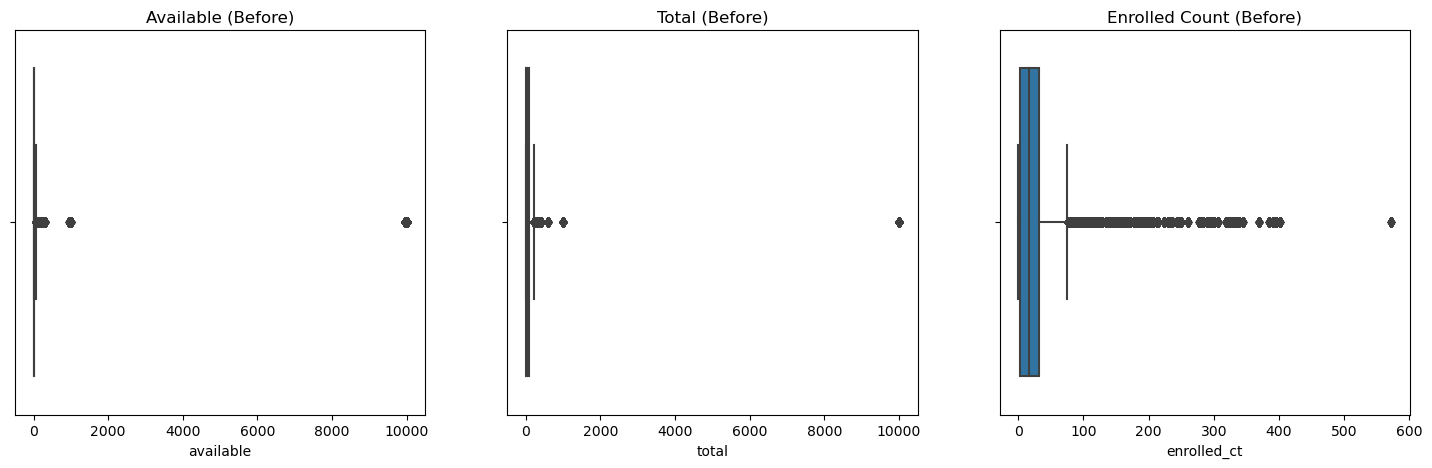

In [9]:
# Visualize the data before removing outliers
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['available'])
plt.title('Available (Before)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['total'])
plt.title('Total (Before)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['enrolled_ct'])
plt.title('Enrolled Count (Before)')
plt.show()

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['available', 'total', 'enrolled_ct']:
    df = remove_outliers_iqr(df, column)

### 4. Logical Relationships

In [11]:
# 'time' and 'prof' is not necessary for analysis
df = df.drop(columns=['time', 'prof'])

In [12]:
# enrolled_ct does not exceed total
valid_enrollment_numbers = df[df['enrolled_ct'] <= df['total']].copy()
valid_enrollment_numbers

,subj_course_id,sec_code,sec_id,available,waitlist,total,enrolled_ct,department_name
0,AAS 10,A01,303104,1,0,34,33,African American Studies
1,AAS 10,A02,303108,0,0,35,35,African American Studies
2,AAS 11,A01,303127,3,0,34,31,African American Studies
3,AAS 11,A02,303133,6,0,34,28,African American Studies
4,AESE 241,A00,301646,2,0,35,33,Aerospace Engineering and Engineering Mechanics
...,...,...,...,...,...,...,...,...
306804,SIOB 242B,A00,327424,0,0,12,12,Scripps Institution of Oceanography Biology
306805,SIOB 262,A00,410045,8,0,25,17,Scripps Institution of Oceanography Biology
306806,SIOB 269,A00,475559,18,0,20,2,Scripps Institution of Oceanography Biology
306807,SIOB 272,A01,327426,4,0,20,16,Scripps Institution of Oceanography Biology


### 5. Feature Engineering

In [13]:
# Feature engineering: Create a new feature 'capacity_utilization'
df['capacity_utilization'] = df['enrolled_ct'] / df['total']
valid_enrollment_numbers['capacity_utilization'] = valid_enrollment_numbers['enrolled_ct'] / valid_enrollment_numbers['total']


# adding to numerical variable list
numerical_columns += ['capacity_utilization']

### 6. Output CSV file

In [14]:
# CSV output with over enrollment
final_cleaned_file_path = 'cleaned_WI24_data_with_over_enrollment.csv'
df.to_csv(final_cleaned_file_path, index=False)
print(f"Cleaned data saved to {final_cleaned_file_path}")

# CSV output without over enrollment
final_cleaned_file_path = 'cleaned_WI24_data_enrollment.csv'
valid_enrollment_numbers.to_csv(final_cleaned_file_path, index=False)
print(f"Cleaned data saved to {final_cleaned_file_path}")

Cleaned data saved to cleaned_WI24_data_with_over_enrollment.csv
Cleaned data saved to cleaned_WI24_data_enrollment.csv


In [15]:
df.head()

,subj_course_id,sec_code,sec_id,available,waitlist,total,enrolled_ct,department_name,capacity_utilization
0,AAS 10,A01,303104,1,0,34,33,African American Studies,0.970588
1,AAS 10,A02,303108,0,0,35,35,African American Studies,1.000000
2,AAS 11,A01,303127,3,0,34,31,African American Studies,0.911765
3,AAS 11,A02,303133,6,0,34,28,African American Studies,0.823529
4,AESE 241,A00,301646,2,0,35,33,Aerospace Engineering and Engineering Mechanics,0.942857


In [16]:
valid_enrollment_numbers.head()

,subj_course_id,sec_code,sec_id,available,waitlist,total,enrolled_ct,department_name,capacity_utilization
0,AAS 10,A01,303104,1,0,34,33,African American Studies,0.970588
1,AAS 10,A02,303108,0,0,35,35,African American Studies,1.000000
2,AAS 11,A01,303127,3,0,34,31,African American Studies,0.911765
3,AAS 11,A02,303133,6,0,34,28,African American Studies,0.823529
4,AESE 241,A00,301646,2,0,35,33,Aerospace Engineering and Engineering Mechanics,0.942857


Univariate Analysis

Text(0.5, 1.0, 'Distribution of Total Seats')

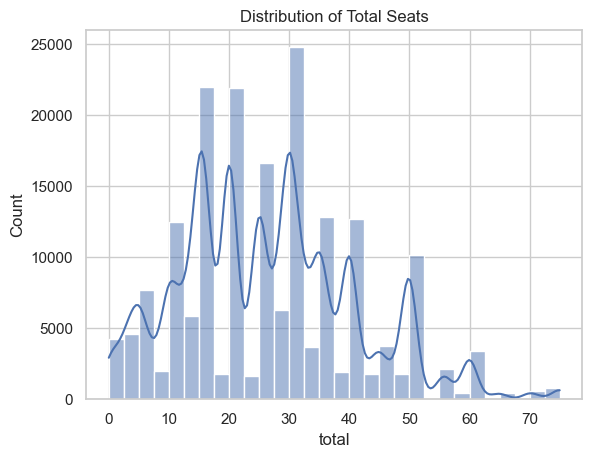

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Distribution of Total Seats
sns.histplot(valid_enrollment_numbers['total'], bins=30, kde=True)
plt.title('Distribution of Total Seats')

The distribution above for total seats vs count suggests a wide range of class sizes, with some peaks indicating common class sizes, due to standard lecture hall capacities.

Text(0.5, 1.0, 'Distribution of Enrolled Count')

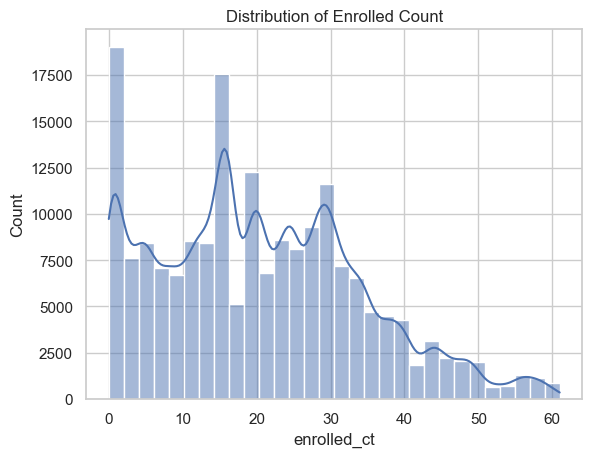

In [18]:
# Distribution of Enrolled Count
sns.histplot(valid_enrollment_numbers['enrolled_ct'], bins=30, kde=True)
plt.title('Distribution of Enrolled Count')

The distribution is somewhat similar to that of total seats, which is expected since these should be correlated.

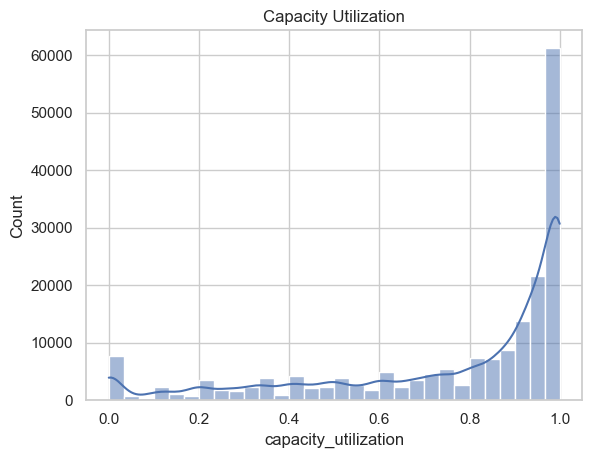

In [19]:
# Distribution of Capacity Utilization
sns.histplot(valid_enrollment_numbers['capacity_utilization'], bins=30, kde=True)
plt.title('Capacity Utilization')
plt.show()

Most classes have high capacity utilization, with a significant number at or near 100%, indicating that many classes are filled to capacity.


Bivariate Analysis

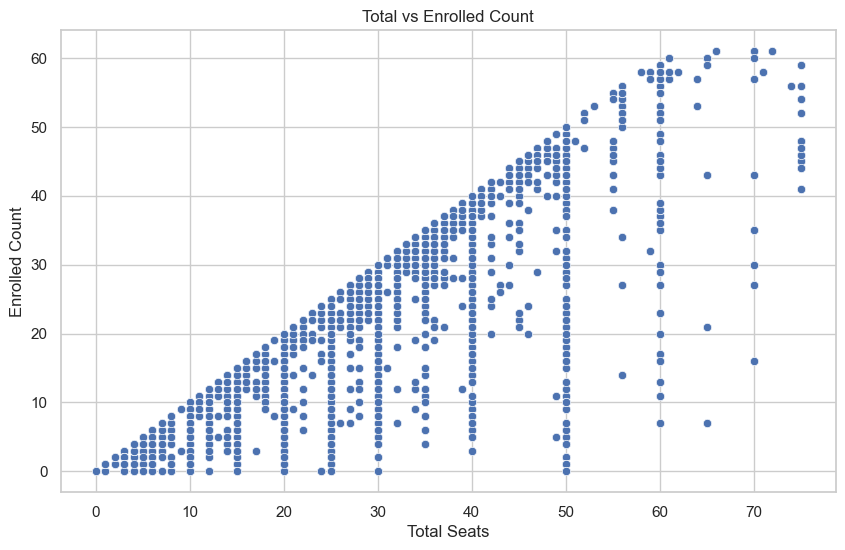

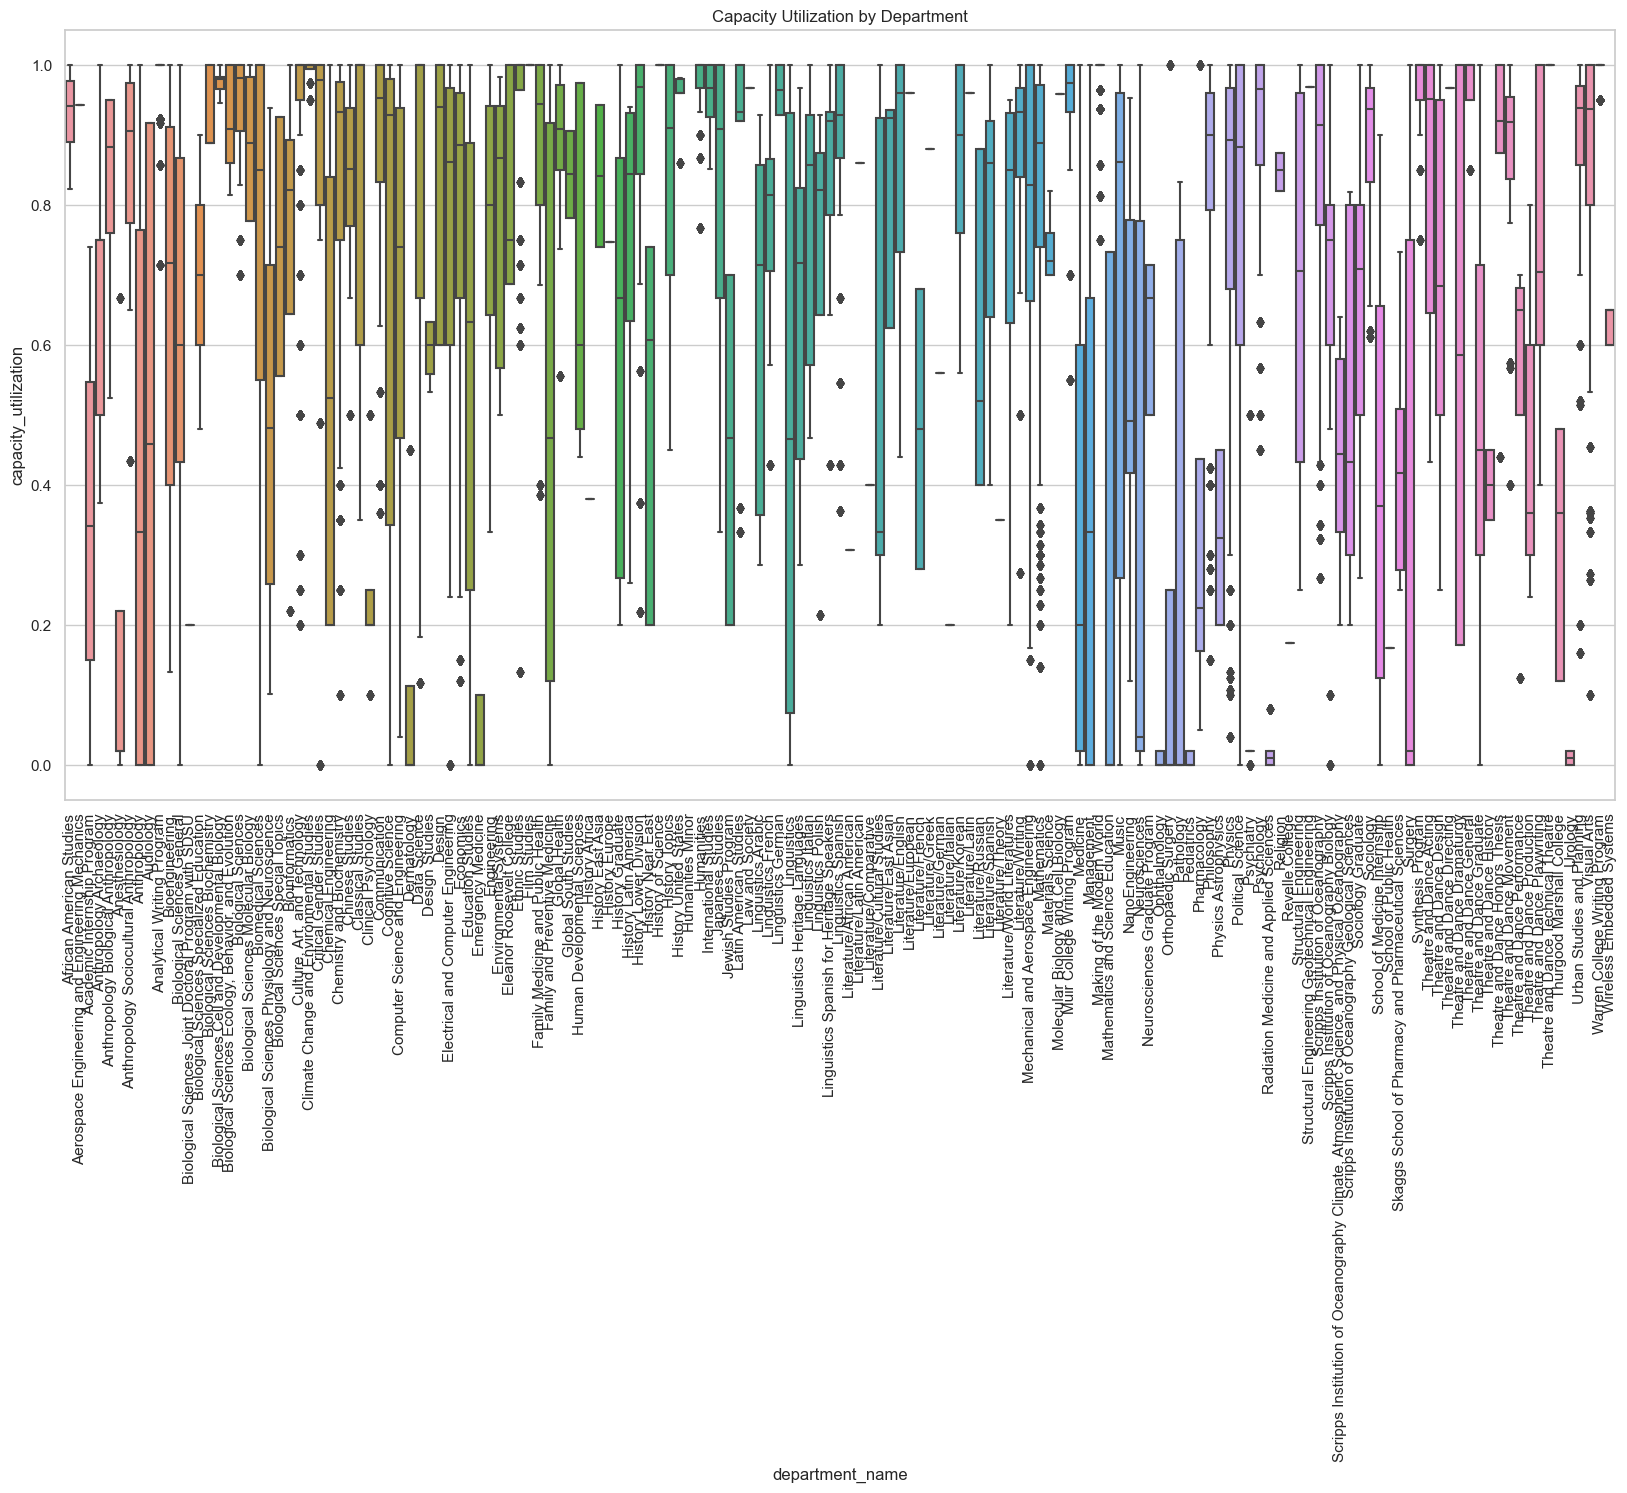

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_enrollment_numbers, x='total', y='enrolled_ct')
plt.title('Total vs Enrolled Count')
plt.xlabel('Total Seats')
plt.ylabel('Enrolled Count')
plt.show()

# Capacity Utilization by Department
plt.figure(figsize=(20, 10))
sns.boxplot(data=valid_enrollment_numbers, x='department_name', y='capacity_utilization')
plt.xticks(rotation=90)
plt.title('Capacity Utilization by Department')
plt.show()


In [21]:
# Most and least popular classes
popular_classes = valid_enrollment_numbers.sort_values(by='enrolled_ct', ascending=False).head()
least_popular_classes = valid_enrollment_numbers.sort_values(by='enrolled_ct').head()

# Most and least popular departments
department_utilization = valid_enrollment_numbers.groupby('department_name')['capacity_utilization'].mean().sort_values(ascending=False)
most_popular_departments = department_utilization.head()
least_popular_departments = department_utilization.tail()

print("Most Popular Classes:\n", popular_classes[['subj_course_id', 'sec_code', 'enrolled_ct']])
print("\nLeast Popular Classes:\n", least_popular_classes[['subj_course_id', 'sec_code', 'enrolled_ct']])
print("\nMost Popular Departments:\n", most_popular_departments)
print("\nLeast Popular Departments:\n", least_popular_departments)


Most Popular Classes:
        subj_course_id sec_code  enrolled_ct
39783        MATH 20E      A02           61
156102        USP 100      A00           61
100474       COGS 100      A02           61
293243       COGS 100      A02           61
232552       MATH 20E      A02           61

Least Popular Classes:
        subj_course_id sec_code  enrolled_ct
20572        TDGR 293      002            0
86845        MATH 275      A01            0
212419       PEDS 296      002            0
250146       ANES 296      003            0
212416       PATH 296      003            0

Most Popular Departments:
 department_name
Theatre and Dance Technical Theatre         1.000000
History of Science                          1.000000
Film Studies                                1.000000
Climate Change and Environmental Studies    0.990625
Warren College Writing Program              0.990000
Name: capacity_utilization, dtype: float64

Least Popular Departments:
 department_name
Radiation Medicine and Appl